In [1]:
import pandas as pd
import os,glob
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append("/Users/damoncrockett/collproc/")
from raw import *

In [2]:
DIR = "/Users/damoncrockett/Dropbox/lml/genome_measurements/"

In [3]:
allgloss = dirwalk(DIR,require='los',omit=['legacy','flag','Test'])

In [4]:
df = pd.DataFrame()
for f in allgloss:
    tmp = fproc(f,dimension='gloss',threshold=0.5)
    if tmp is not None:
        df = pd.concat([df,tmp])

In [10]:
df = df.reset_index(drop=True)

In [11]:
df['mera'] = 'mod'

In [65]:
df['g60'] = df.gloss.map(lambda x: x[1])

# Legacy

In [62]:
legacygloss = dirwalk(DIR,require=['los','egac'])
legacygloss[0]

'/Users/damoncrockett/Dropbox/lml/genome_measurements/genome_legacy/gloss.xlsx'

We will use only this file, with measurements from 2015; Genevieve did a bunch of tests on binder papers in 2018, but none are at the 60 degree angle.

In [45]:
paul = fproc(legacygloss[0],dimension='gloss')

In [46]:
paul = paul[paul['gloss'].apply(lambda x: len(x)) != 11] # we don't have a 60 degree mean for this item

In [47]:
# If there are 12 measurements, we want the 5th; if there are 3, we want the 2nd

paul['g60'] = paul.gloss.map(lambda x: x[4] if len(x)==12 else x[2])

In [51]:
paul = paul[['catalog','fname','g60']]

In [69]:
#paul.catalog.value_counts().loc[lambda x: x > 1]

# STD

In [71]:
allvals = list(df.g60) + list(paul.g60)

In [73]:
g60std = np.std(allvals)
g60std

29.978124258790643

In [76]:
max(allvals)

271.3495

<AxesSubplot:>

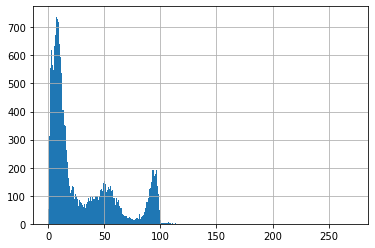

In [80]:
df.g60.hist(bins=300)

<AxesSubplot:>

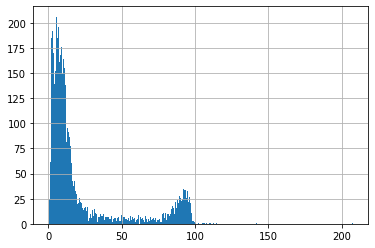

In [81]:
paul.g60.hist(bins=300)

In [82]:
paul[paul.g60 > 100]

,catalog,fname,g60
565,1880d_Kodak_GlossyVelox_dmax,gloss.xlsx,207.705124
566,1880d_Kodak_GlossyVelox_dmid,gloss.xlsx,110.272163
567,1880d_Kodak_GlossyVelox_dmin,gloss.xlsx,141.711975
604,1880q_Kodak_GlossyVelox_dmax,gloss.xlsx,105.831322
2222,296k_Kodak_PolyLure_dmin,gloss.xlsx,109.691933
2223,298a_Kodak_Polycontrast_dmax,gloss.xlsx,106.036293
3630,5021i_Kodak_Velox_dmid,gloss.xlsx,101.863159
3631,5021i_Kodak_Velox_dmin,gloss.xlsx,114.327911
3700,5165qq_Defender_VelourBlack_dmax,gloss.xlsx,112.763313
3701,5165r_Defender_Varigam_dmax,gloss.xlsx,107.659790


In [83]:
df[df.g60 > 200]

,catalog,gloss,gloss_str,fname,mera,g60
9825,1880d_kg_0,"[207.7647, 211.7605, 94.04149]","[207.7647, 211.7605, 94.04149]",gloss_dc_box1_1_1.xlsx,mod,211.7605
10668,4790j_kg_0,"[219.5898, 209.7835, 90.07972]","[219.5898, 209.7835, 90.07972]",gloss_dc_box1_1_0.xlsx,mod,209.7835
10669,4790j_kg_1,"[293.1937, 271.3495, 90.41533]","[293.1937, 271.3495, 90.41533]",gloss_dc_box1_1_0.xlsx,mod,271.3495
